In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
data = pd.read_csv('train.csv')
data

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
data = np.array(data)

In [8]:
data = np.array(data)
m, n = data.shape
print(data.shape)
np.random.shuffle(data) # shuffle before splitting into dev and training sets

test = data[0:1000].T
Y_dev = test[0]
X_dev = test[1:n]
X_dev = X_dev / 255.

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape
print(X_train.shape)



(42000, 785)
(784, 41000)


In [10]:
def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

def ReLU(Z):
    return np.maximum(Z, 0)

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A
    
def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = Z1
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def ReLU_deriv(Z):
    return Z > 0

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dW2 = 1 / m * (A2 - one_hot_Y).dot(A1.T)
    db2 = 1 / m * np.sum(A2 - one_hot_Y)
    dW1 = 1 / m * (A2 - one_hot_Y).dot(X.T)
    db1 = 1 / m * np.sum(A1 - one_hot_Y)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1    
    W2 = W2 - alpha * dW2  
    b2 = b2 - alpha * db2    
    return W1, b1, W2, b2

In [11]:
def get_predictions(A2):
    return np.argmax(A2, 0)

#calculer le pourcentage des valeur true predite
def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y,iterations, alpha):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2

In [12]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train,100000,0.04)

Iteration:  0
[2 2 7 ... 7 2 2] [0 8 2 ... 5 6 4]
0.08902439024390243
Iteration:  10
[0 2 2 ... 7 2 3] [0 8 2 ... 5 6 4]
0.1135609756097561
Iteration:  20
[0 2 2 ... 7 2 3] [0 8 2 ... 5 6 4]
0.15239024390243902
Iteration:  30
[0 2 2 ... 7 2 3] [0 8 2 ... 5 6 4]
0.20146341463414635
Iteration:  40
[0 2 2 ... 7 2 3] [0 8 2 ... 5 6 4]
0.2799268292682927
Iteration:  50
[0 5 2 ... 7 6 1] [0 8 2 ... 5 6 4]
0.36221951219512194
Iteration:  60
[0 5 2 ... 7 6 1] [0 8 2 ... 5 6 4]
0.42390243902439023
Iteration:  70
[0 5 2 ... 7 6 2] [0 8 2 ... 5 6 4]
0.47817073170731705
Iteration:  80
[0 5 2 ... 7 6 2] [0 8 2 ... 5 6 4]
0.5193658536585366
Iteration:  90
[0 8 2 ... 7 6 2] [0 8 2 ... 5 6 4]
0.5543170731707318
Iteration:  100
[0 8 2 ... 5 6 2] [0 8 2 ... 5 6 4]
0.5871219512195122
Iteration:  110
[0 8 2 ... 5 6 2] [0 8 2 ... 5 6 4]
0.6131219512195122
Iteration:  120
[0 8 2 ... 5 6 2] [0 8 2 ... 5 6 4]
0.6348048780487805
Iteration:  130
[0 8 2 ... 5 6 2] [0 8 2 ... 5 6 4]
0.6516829268292683
Iteration: 

In [80]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [2]
Label:  2


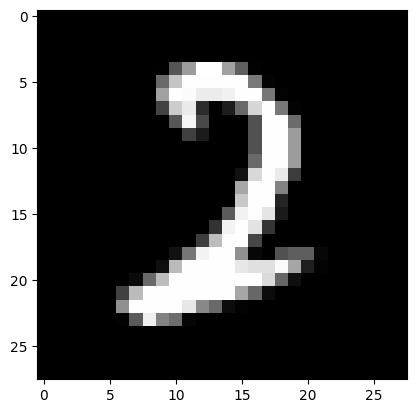

Prediction:  [2]
Label:  2


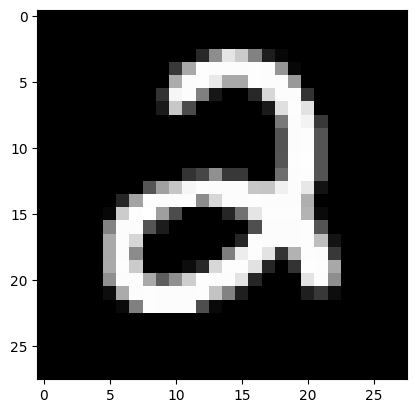

Prediction:  [2]
Label:  2


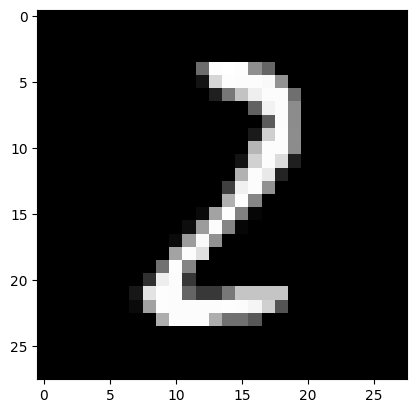

Prediction:  [8]
Label:  8


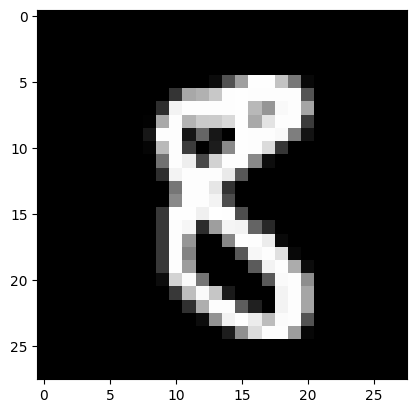

Prediction:  [8]
Label:  8


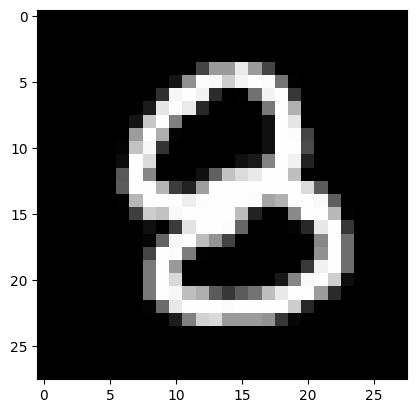

Prediction:  [0]
Label:  0


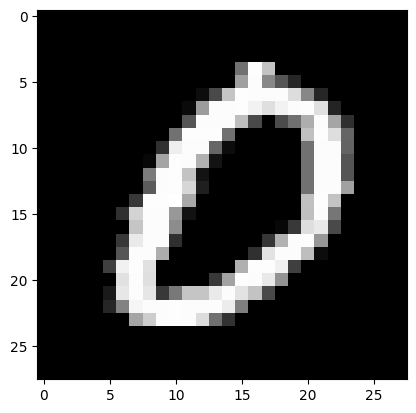

Prediction:  [1]
Label:  1


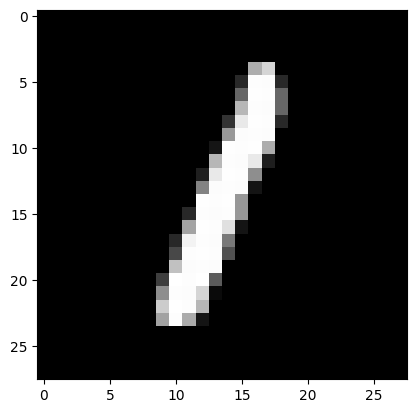

Prediction:  [7]
Label:  7


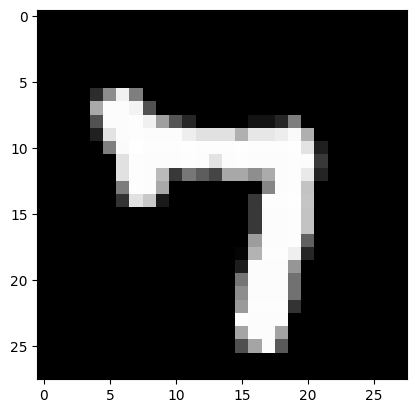

In [81]:
test_prediction(0, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(4, W1, b1, W2, b2)
test_prediction(5, W1, b1, W2, b2)
test_prediction(6, W1, b1, W2, b2)
test_prediction(51, W1, b1, W2, b2)
test_prediction(100, W1, b1, W2, b2)